In [2]:
import nibabel as nib
import numpy as np
import os

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
folder_path = '/content/drive/MyDrive/NiftiFiles'

# Getting all .nii or .nii.gz files
nii_files = [f for f in os.listdir(folder_path) if f.endswith('.nii') or f.endswith('.nii.gz')]

# Loading and inspecting each file
for file in nii_files:
    file_path = os.path.join(folder_path, file)
    img = nib.load(file_path)
    print(f"Loaded {file} with shape {img.shape}")

Loaded sub-62038_ses-1_acq-t1csmp2ragesag06mmUNIDEN_T1w.nii with shape (256, 362, 384)
Loaded sub-65304_ses-2_acq-t1csmp2ragesag06mmUNIDEN_T1w.nii with shape (256, 384, 384)
Loaded sub-65304_ses-1_acq-t1csmp2ragesag06mmUNIDEN_T1w.nii with shape (256, 384, 384)
Loaded sub-66287_ses-1_acq-t1csmp2ragesag06mmUNIDEN_T1w.nii with shape (256, 362, 384)
Loaded sub-68576_ses-2_acq-t1csmp2ragesag06mmUNIDEN_T1w.nii with shape (256, 362, 384)


In [5]:
!pip install SimpleITK
import SimpleITK as sitk
import os

# Paths
nii_folder = '/content/drive/MyDrive/NiftiFiles'
dicom_output_root = '/content/drive/MyDrive/DICOM_Output_SITK'
os.makedirs(dicom_output_root, exist_ok=True)

# List of NIfTI files
nii_files = [f for f in os.listdir(nii_folder) if f.endswith('.nii') or f.endswith('.nii.gz')]

for nii_file in nii_files:
    # Loading NIfTI image
    nii_path = os.path.join(nii_folder, nii_file)
    image = sitk.ReadImage(nii_path)

    # Preparing output folder
    patient_id = os.path.splitext(nii_file)[0].replace('.nii', '').replace('.gz', '')
    dicom_folder = os.path.join(dicom_output_root, patient_id)
    os.makedirs(dicom_folder, exist_ok=True)

    print(f"Converting {nii_file} -> {dicom_folder} ...")

    # Getting number of slices (depth)
    num_slices = image.GetDepth()

    # Writing each slice as a DICOM file
    for i in range(num_slices):
        slice_img = image[:, :, i]
        slice_img = sitk.Cast(slice_img, sitk.sitkInt16)

        # Fixing the direction matrix to avoid DICOM errors
        slice_img.SetDirection([1.0, 0.0,
                        0.0, 1.0])


        slice_path = os.path.join(dicom_folder, f"slice_{i:03d}.dcm")

        # Adding basic DICOM metadata
        slice_img.SetMetaData("0008|0060", "MR")               # Modality
        slice_img.SetMetaData("0010|0010", "Test^Subject")     # Patient Name
        slice_img.SetMetaData("0010|0020", "123456")           # Patient ID
        slice_img.SetMetaData("0008|103e", f"Slice {i}")       # Series Description

        sitk.WriteImage(slice_img, slice_path)

    print(f"Saved {num_slices} slices to {dicom_folder}")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.6/52.6 MB 18.9 MB/s eta 0:00:00
Converting sub-62038_ses-1_acq-t1csmp2ragesag06mmUNIDEN_T1w.nii -> /content/drive/MyDrive/DICOM_Output_SITK/sub-62038_ses-1_acq-t1csmp2ragesag06mmUNIDEN_T1w ...
Saved 384 slices to /content/drive/MyDrive/DICOM_Output_SITK/sub-62038_ses-1_acq-t1csmp2ragesag06mmUNIDEN_T1w
Converting sub-65304_ses-2_acq-t1csmp2ragesag06mmUNIDEN_T1w.nii -> /content/drive/MyDrive/DICOM_Output_SITK/sub-65304_ses-2_acq-t1csmp2ragesag06mmUNIDEN_T1w ...
Saved 384 slices to /content/drive/MyDrive/DICOM_Output_SITK/sub-65304_ses-2_acq-t1csmp2ragesag06mmUNIDEN_T1w
Converting sub-65304_ses-1_acq-t1csmp2ragesag06mmUNIDEN_T1w.nii -> /content/drive/MyDrive/DICOM_Output_SITK/sub-65304_ses-1_acq-t1csmp2ragesag06mmUNIDEN_T1w ...
Saved 384 slices to /content/drive/MyDrive/DICOM_Output_SITK/sub-65304_ses-1_acq-t1csmp2ragesag06mmUNIDEN_T1w
Converting sub-66287_ses-1_acq-t1csmp2ragesag06mmUNIDEN_T1w.nii -> /content/drive/MyDrive/DICOM_Output_SITK/

### Using simpleITK for a unified interface

In [6]:
import SimpleITK as sitk

# Paths
nii_folder = '/content/drive/MyDrive/NiftiFiles'
dicom_output_root = '/content/drive/MyDrive/DICOM_Output_SITK'
os.makedirs(dicom_output_root, exist_ok=True)

# List of NIfTI files
nii_files = [f for f in os.listdir(nii_folder) if f.endswith('.nii') or f.endswith('.nii.gz')]

for nii_file in nii_files:
    # Loading NIfTI image
    nii_path = os.path.join(nii_folder, nii_file)
    image = sitk.ReadImage(nii_path)

    # Preparing output folder
    patient_id = os.path.splitext(nii_file)[0].replace('.nii', '').replace('.gz', '')
    dicom_folder = os.path.join(dicom_output_root, patient_id)
    os.makedirs(dicom_folder, exist_ok=True)

    print(f"Converting {nii_file} -> {dicom_folder} ...")

    # Getting number of slices (depth)
    num_slices = image.GetDepth()

    # Writing each slice as a DICOM file
for i in range(num_slices):
    slice_img = image[:, :, i]
    slice_img = sitk.Cast(slice_img, sitk.sitkInt16)

    # Fixing the direction matrix to 2x2 for 2D slice
    slice_img.SetDirection([1.0, 0.0,
                            0.0, 1.0])

    slice_path = os.path.join(dicom_folder, f"slice_{i:03d}.dcm")

    # Adding basic DICOM metadata
    slice_img.SetMetaData("0008|0060", "MR")               # Modality
    slice_img.SetMetaData("0010|0010", "Test^Subject")     # Patient Name
    slice_img.SetMetaData("0010|0020", "123456")           # Patient ID
    slice_img.SetMetaData("0008|103e", f"Slice {i}")       # Series Description

    sitk.WriteImage(slice_img, slice_path)


    print(f"Saved {num_slices} slices to {dicom_folder}")


Converting sub-62038_ses-1_acq-t1csmp2ragesag06mmUNIDEN_T1w.nii -> /content/drive/MyDrive/DICOM_Output_SITK/sub-62038_ses-1_acq-t1csmp2ragesag06mmUNIDEN_T1w ...
Converting sub-65304_ses-2_acq-t1csmp2ragesag06mmUNIDEN_T1w.nii -> /content/drive/MyDrive/DICOM_Output_SITK/sub-65304_ses-2_acq-t1csmp2ragesag06mmUNIDEN_T1w ...
Converting sub-65304_ses-1_acq-t1csmp2ragesag06mmUNIDEN_T1w.nii -> /content/drive/MyDrive/DICOM_Output_SITK/sub-65304_ses-1_acq-t1csmp2ragesag06mmUNIDEN_T1w ...
Converting sub-66287_ses-1_acq-t1csmp2ragesag06mmUNIDEN_T1w.nii -> /content/drive/MyDrive/DICOM_Output_SITK/sub-66287_ses-1_acq-t1csmp2ragesag06mmUNIDEN_T1w ...
Converting sub-68576_ses-2_acq-t1csmp2ragesag06mmUNIDEN_T1w.nii -> /content/drive/MyDrive/DICOM_Output_SITK/sub-68576_ses-2_acq-t1csmp2ragesag06mmUNIDEN_T1w ...
Saved 384 slices to /content/drive/MyDrive/DICOM_Output_SITK/sub-68576_ses-2_acq-t1csmp2ragesag06mmUNIDEN_T1w
Saved 384 slices to /content/drive/MyDrive/DICOM_Output_SITK/sub-68576_ses-2_acq-t1cs

## Exploring internal structure and metadata of these formats





In [8]:
#For NIfTI:
nii_folder = '/content/drive/MyDrive/NiftiFiles'
nii_files = [f for f in os.listdir(nii_folder) if f.endswith('.nii') or f.endswith('.nii.gz')]

for file in nii_files:
    file_path = os.path.join(nii_folder, file)
    img = nib.load(file_path)

    print(f"=== {file} ===")
    print("Shape:", img.shape)
    print("Affine matrix:\n", img.affine)
    print("Voxel spacing (zooms):", img.header.get_zooms())
    print("Data type:", img.get_data_dtype())
    print("Header info:\n", img.header)
    print("\n\n")

=== sub-62038_ses-1_acq-t1csmp2ragesag06mmUNIDEN_T1w.nii ===
Shape: (256, 362, 384)
Affine matrix:
 [[ 6.29074156e-01 -1.33072212e-02 -3.11387163e-02 -7.36054077e+01]
 [ 1.63442213e-02  6.21981978e-01  5.91654330e-02 -1.00073349e+02]
 [ 2.99664345e-02 -5.98863661e-02  6.21413589e-01 -1.19990189e+02]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]]
Voxel spacing (zooms): (np.float32(0.63), np.float32(0.625), np.float32(0.625))
Data type: int16
Header info:
 <class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : np.bytes_(b'')
db_name         : np.bytes_(b'')
extents         : 0
session_error   : 0
regular         : np.bytes_(b'r')
dim_info        : 54
dim             : [  3 256 362 384   1   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : int16
bitpix          : 16
slice_start     : 0
pixdim          : [1.    0.63  0.625 0.625 6.    0.    0.    0.   ]
vox_of

In [7]:
!pip install pydicom numpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 30.4 MB/s eta 0:00:00


In [11]:
import os
import numpy as np
import pydicom

def get_sort_key(dicom_header_ds):

    inst = getattr(dicom_header_ds, "InstanceNumber", None)
    if inst is not None:
        try:
            return int(inst)
        except:
            pass

    ipp = getattr(dicom_header_ds, "ImagePositionPatient", None)
    if isinstance(ipp, (list, tuple)) and len(ipp) == 3:
        try:
            return float(ipp[2])
        except:
            pass

    return 0


def load_and_sort_dicom_filepaths(dicom_folder):
    # Gathering all .dcm paths
    dicom_paths = [
        os.path.join(dicom_folder, fname)
        for fname in os.listdir(dicom_folder)
        if fname.lower().endswith(".dcm")
    ]
    if not dicom_paths:
        raise FileNotFoundError(f"No DICOM files (.dcm) found in folder: {dicom_folder}")

    # Reading headers only to build (path, sort_key) pairs
    path_key_pairs = []
    for fpath in dicom_paths:
        try:
            ds_header = pydicom.dcmread(fpath, stop_before_pixels=True)
        except Exception as e:
            # Skipping unreadable headers
            print(f"  WARNING: Cannot read header of {fpath!r} → {e}")
            continue
        key = get_sort_key(ds_header)
        path_key_pairs.append((fpath, key))

    if not path_key_pairs:
        raise RuntimeError(f"No valid DICOM headers could be read in: {dicom_folder}")

    # Sorting pairs by key ascending
    path_key_pairs.sort(key=lambda pk: pk[1])

    # Extracting sorted file paths
    sorted_paths = [pk[0] for pk in path_key_pairs]
    return sorted_paths


def stack_dicom_series_to_volume(dicom_folder):
    # Getting sorted list of file paths
    sorted_filepaths = load_and_sort_dicom_filepaths(dicom_folder)

    # Reading the first slice fully (with pixel data) to get shape & dtype
    first_ds_full = pydicom.dcmread(sorted_filepaths[0])
    first_slice_array = first_ds_full.pixel_array
    rows, cols = first_slice_array.shape
    dtype = first_slice_array.dtype
    n_slices = len(sorted_filepaths)

    # Pre-allocating volume
    volume_3d = np.zeros((n_slices, rows, cols), dtype=dtype)

    # Filling the 3D volume
    for i, fpath in enumerate(sorted_filepaths):
        ds_full = pydicom.dcmread(fpath)   # read with pixel data
        arr = ds_full.pixel_array
        if arr.shape != (rows, cols):
            raise RuntimeError(
                f"Shape mismatch: slice {i} from file {fpath} has shape {arr.shape}, "
                f"expected {(rows, cols)}"
            )
        volume_3d[i, :, :] = arr

    # Extracting voxel spacing from first slice
    ps = first_ds_full.get("PixelSpacing", [None, None])
    row_spacing = float(ps[0]) if ps[0] is not None else None
    col_spacing = float(ps[1]) if ps[1] is not None else None

    slice_thickness = first_ds_full.get("SliceThickness", None)
    spacing_between = first_ds_full.get("SpacingBetweenSlices", None)
    if spacing_between is not None:
        slice_spacing = float(spacing_between)
    elif slice_thickness is not None:
        slice_spacing = float(slice_thickness)
    else:
        slice_spacing = None

    voxel_spacing = (row_spacing, col_spacing, slice_spacing)

    return volume_3d, voxel_spacing

dicom_folder_path = "/content/drive/MyDrive/DICOM_Output_SITK/sub-62038_ses-1_acq-t1csmp2ragesag06mmUNIDEN_T1w"

print(f"Reading and sorting DICOM slices in: {dicom_folder_path}")
dicom_volume, dicom_voxel_spacing = stack_dicom_series_to_volume(dicom_folder_path)

print("\n[DICOM] Finished stacking:")
print(f"  Volume shape (slices, rows, cols): {dicom_volume.shape}")
print(f"  Voxel spacing (row_mm, col_mm, slice_mm): {dicom_voxel_spacing}")


Reading and sorting DICOM slices in: /content/drive/MyDrive/DICOM_Output_SITK/sub-62038_ses-1_acq-t1csmp2ragesag06mmUNIDEN_T1w

[DICOM] Finished stacking:
  Volume shape (slices, rows, cols): (384, 362, 256)
  Voxel spacing (row_mm, col_mm, slice_mm): (0.625, 0.629999995231628, 1.0)


### DICOM Metadata Extraction and Stacking

In [14]:
import os
import numpy as np
import pydicom

dicom_folder = '/content/drive/MyDrive/DICOM_Output'

dicom_files = [os.path.join(dicom_folder, f) for f in os.listdir(dicom_folder) if f.lower().endswith('.dcm')]
print(f"Number of DICOM files found: {len(dicom_files)}")

# Reading slices
slices = [pydicom.dcmread(f) for f in dicom_files]
print(f"Number of slices successfully read: {len(slices)}")

# Verifying pixel arrays
valid_slices = []
for i, s in enumerate(slices):
    try:
        _ = s.pixel_array
        valid_slices.append(s)
    except Exception as e:
        print(f"Slice {i} skipped (no pixel_array): {e}")

print(f"Number of valid image slices: {len(valid_slices)}")

# Proceeding only if we have valid image slices
if valid_slices:
    # Sorting slices by ImagePositionPatient or InstanceNumber
    valid_slices.sort(key=lambda s: float(s.ImagePositionPatient[2]) if 'ImagePositionPatient' in s else int(s.InstanceNumber))

    # Stacking pixel arrays into a 3D volume
    volume = np.stack([s.pixel_array for s in valid_slices], axis=-1)
    print("Stacked volume shape:", volume.shape)

    # Example: Extract metadata from the first slice
    sample = valid_slices[0]
    print("Patient Name:", sample.PatientName)
    print("Modality:", sample.Modality)
    print("Pixel Spacing:", sample.PixelSpacing)
    print("Slice Thickness:", sample.SliceThickness)
    print("Image Position Patient:", sample.ImagePositionPatient)
else:
    print("No valid image slices found.")


Number of DICOM files found: 0
Number of slices successfully read: 0
Number of valid image slices: 0
No valid image slices found.


### Viewing Anatomical Planes

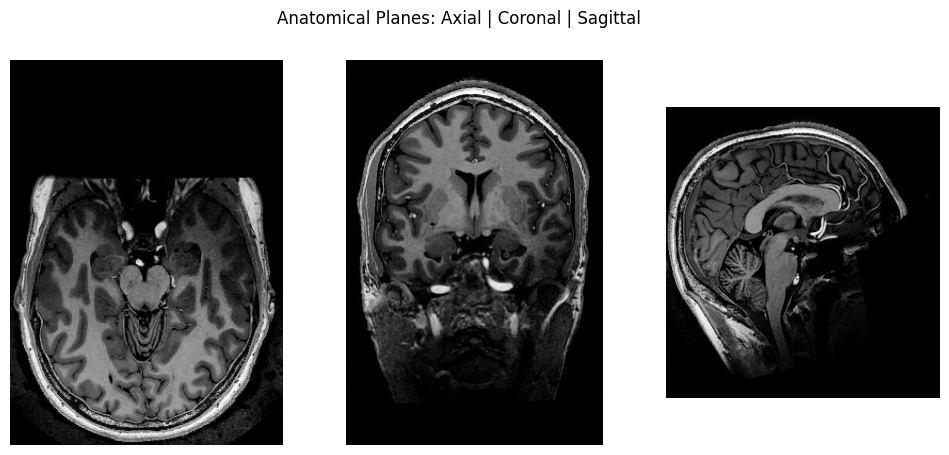

In [15]:
import matplotlib.pyplot as plt

def show_slices(slices, title):
    fig, axes = plt.subplots(1, len(slices), figsize=(12, 5))
    for i, slice in enumerate(slices):
        axes[i].imshow(slice.T, cmap="gray", origin="lower")
        axes[i].axis('off')
    fig.suptitle(title)
    plt.show()

# Visualizing from NIfTI file
img = nib.load(nii_path)
data = img.get_fdata()

# Axial, Coronal, Sagittal slices
axial_slice = data[:, :, data.shape[2]//2]
coronal_slice = data[:, data.shape[1]//2, :]
sagittal_slice = data[data.shape[0]//2, :, :]

show_slices([axial_slice, coronal_slice, sagittal_slice], "Anatomical Planes: Axial | Coronal | Sagittal")